# Validity of using prescription records to identify patient comorbidities
## Analysis of migraine

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|Own code list|
|drug codes|bnf 060601, 060601, 090604, 0905011|
|sql date|13.03.2025|
|sql code|migraineselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [migraine_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Non-opioid and compound analgesic" if bnf_code== "040701"
replace bnf_code = "Antimigraine drugs" if bnf_code== "040704"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(10,083 missing values generated)
(10,083 real changes made)
(7,778 missing values generated)
(7,778 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str33
(23 real changes made)
(10,044 real changes made)
(16 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


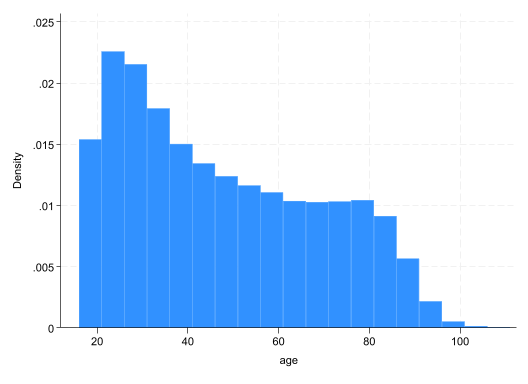

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +-------------------------------------------------------------------------------------+
  |                                               description   Freq.   Percent     %<= |
  |-------------------------------------------------------------------------------------|
  |                                                  Migraine    5260     67.63   67.63 |
  |                                             H/O: migraine     497      6.39   74.02 |
  |                                        Migraine with aura     347      4.46   78.48 |
  |                                        Classical migraine     269      3.46   81.94 |
  |                                     Migraine without aura     256      3.29   85.23 |
  |-------------------------------------------------------------------------------------|
  |                                      Migraine - menstrual     216      2.78   88.00 |
  |                                 Cluster headache syndrome     114      1.47   89.47 |
  |      

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +--------------------------------------------------------------+
  |                          bnf_code   Freq.   Percent      %<= |
  |--------------------------------------------------------------|
  |                Antimigraine drugs   10044     99.61    99.61 |
  | Non-opioid and compound analgesic      23      0.23    99.84 |
  |                     Other/unknown      16      0.16   100.00 |
  +--------------------------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,225      3,553 |     7,778 
    Normal |     5,858    411,364 |   417,222 
-----------+----------------------+----------
     Total |    10,083    414,917 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.3%     53.2%     55.4%
Specificity                      Pr(-|N)     98.6%     98.6%     98.6%
ROC area               (Sens. + Spec.)/2      0.76      0.76      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     38.69     37.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       886        710 |     1,596 
    Normal |     1,220    205,469 |   206,689 
-----------+----------------------+----------
     Total |     2,106    206,179 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.8%      0.7%       0.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     55.5%     53.0%     58.0%
Specificity                      Pr(-|N)     99.4%     99.4%     99.4%
ROC area               (Sens. + Spec.)/2      0.77      0.76      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     94.05     87.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,339      2,843 |     6,182 
    Normal |     4,638    205,886 |   210,524 
-----------+----------------------+----------
     Total |     7,977    208,729 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.9%      2.8%       2.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.0%     52.8%     55.3%
Specificity                      Pr(-|N)     97.8%     97.7%     97.9%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.52     23.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,645      1,586 |     3,231 
    Normal |     1,353    113,090 |   114,443 
-----------+----------------------+----------
     Total |     2,998    114,676 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.7%      2.7%       2.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     50.9%     49.2%     52.7%
Specificity                      Pr(-|N)     98.8%     98.8%     98.9%
ROC area               (Sens. + Spec.)/2      0.75      0.74      0.76 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     43.06     40.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,438      1,735 |     4,173 
    Normal |     3,931    213,291 |   217,222 
-----------+----------------------+----------
     Total |     6,369    215,026 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     58.4%     56.9%     59.9%
Specificity                      Pr(-|N)     98.2%     98.1%     98.2%
ROC area               (Sens. + Spec.)/2      0.78      0.78      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.28     31.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       142        232 |       374 
    Normal |       574     84,983 |    85,557 
-----------+----------------------+----------
     Total |       716     85,215 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.4%       0.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     38.0%     33.0%     43.1%
Specificity                      Pr(-|N)     99.3%     99.3%     99.4%
ROC area               (Sens. + Spec.)/2      0.69      0.66      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     56.59     48.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,400        974 |     2,374 
    Normal |     2,000    145,626 |   147,626 
-----------+----------------------+----------
     Total |     3,400    146,600 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     59.0%     57.0%     61.0%
Specificity                      Pr(-|N)     98.6%     98.6%     98.7%
ROC area               (Sens. + Spec.)/2      0.79      0.78      0.80 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     43.53     41.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,559      1,307 |     2,866 
    Normal |     2,084    145,050 |   147,134 
-----------+----------------------+----------
     Total |     3,643    146,357 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.4%     52.6%     56.2%
Specificity                      Pr(-|N)     98.6%     98.5%     98.6%
ROC area               (Sens. + Spec.)/2      0.76      0.76      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     38.40     36.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,266      1,272 |     2,538 
    Normal |     1,774    120,688 |   122,462 
-----------+----------------------+----------
     Total |     3,040    121,960 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      2.0%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     49.9%     47.9%     51.8%
Specificity                      Pr(-|N)     98.6%     98.5%     98.6%
ROC area               (Sens. + Spec.)/2      0.74      0.73      0.75 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     34.43     32.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,597      1,191 |     2,788 
    Normal |     2,256    149,507 |   151,763 
-----------+----------------------+----------
     Total |     3,853    150,698 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     57.3%     55.4%     59.1%
Specificity                      Pr(-|N)     98.5%     98.5%     98.6%
ROC area               (Sens. + Spec.)/2      0.78      0.77      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     38.53     36.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,378      1,307 |     2,685 
    Normal |     2,051    138,309 |   140,360 
-----------+----------------------+----------
     Total |     3,429    139,616 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     51.3%     49.4%     53.2%
Specificity                      Pr(-|N)     98.5%     98.5%     98.6%
ROC area               (Sens. + Spec.)/2      0.75      0.74      0.76 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.12     33.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,212      1,031 |     2,243 
    Normal |     1,528    121,044 |   122,572 
-----------+----------------------+----------
     Total |     2,740    122,075 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.0%     51.9%     56.1%
Specificity                      Pr(-|N)     98.8%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     43.35     40.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       961        798 |     1,759 
    Normal |     1,474     86,404 |    87,878 
-----------+----------------------+----------
     Total |     2,435     87,202 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      1.9%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.6%     52.3%     57.0%
Specificity                      Pr(-|N)     98.3%     98.2%     98.4%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.78 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.57     30.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       155        148 |       303 
    Normal |       155     16,267 |    16,422 
-----------+----------------------+----------
     Total |       310     16,415 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.6%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     51.2%     45.4%     56.9%
Specificity                      Pr(-|N)     99.1%     98.9%     99.2%
ROC area               (Sens. + Spec.)/2      0.75      0.72      0.78 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     54.20     44.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       548        498 |     1,046 
    Normal |       672     44,825 |    45,497 
-----------+----------------------+----------
     Total |     1,220     45,323 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.2%      2.1%       2.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     52.4%     49.3%     55.5%
Specificity                      Pr(-|N)     98.5%     98.4%     98.6%
ROC area               (Sens. + Spec.)/2      0.75      0.74      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.47     32.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       844        588 |     1,432 
    Normal |     1,229     83,450 |    84,679 
-----------+----------------------+----------
     Total |     2,073     84,038 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     58.9%     56.3%     61.5%
Specificity                      Pr(-|N)     98.5%     98.5%     98.6%
ROC area               (Sens. + Spec.)/2      0.79      0.77      0.80 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.61     37.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       517        456 |       973 
    Normal |       582     46,038 |    46,620 
-----------+----------------------+----------
     Total |     1,099     46,494 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      1.9%       2.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     53.1%     49.9%     56.3%
Specificity                      Pr(-|N)     98.8%     98.6%     98.9%
ROC area               (Sens. + Spec.)/2      0.76      0.74      0.78 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     42.56     38.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       813        716 |     1,529 
    Normal |     1,092     87,864 |    88,956 
-----------+----------------------+----------
     Total |     1,905     88,580 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     53.2%     50.6%     55.7%
Specificity                      Pr(-|N)     98.8%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     43.31     40.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       279        265 |       544 
    Normal |       493     35,139 |    35,632 
-----------+----------------------+----------
     Total |       772     35,404 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.4%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     51.3%     47.0%     55.6%
Specificity                      Pr(-|N)     98.6%     98.5%     98.7%
ROC area               (Sens. + Spec.)/2      0.75      0.73      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     37.07     32.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,207      1,733 |     3,940 
    Normal |     3,540    221,275 |   224,815 
-----------+----------------------+----------
     Total |     5,747    223,008 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.7%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     56.0%     54.4%     57.6%
Specificity                      Pr(-|N)     98.4%     98.4%     98.5%
ROC area               (Sens. + Spec.)/2      0.77      0.76      0.78 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.57     34.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       117        104 |       221 
    Normal |       178     13,345 |    13,523 
-----------+----------------------+----------
     Total |       295     13,449 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.4%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     52.9%     46.1%     59.7%
Specificity                      Pr(-|N)     98.7%     98.5%     98.9%
ROC area               (Sens. + Spec.)/2      0.76      0.73      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.22     33.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,901      1,716 |     3,617 
    Normal |     2,132    176,616 |   178,748 
-----------+----------------------+----------
     Total |     4,033    178,332 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.0%      1.9%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     52.6%     50.9%     54.2%
Specificity                      Pr(-|N)     98.8%     98.8%     98.9%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.76 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     44.06     41.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,195      2,653 |     5,848 
    Normal |     4,287    311,562 |   315,849 
-----------+----------------------+----------
     Total |     7,482    314,215 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     54.6%     53.3%     55.9%
Specificity                      Pr(-|N)     98.6%     98.6%     98.7%
ROC area               (Sens. + Spec.)/2      0.77      0.76      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.25     38.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,030        900 |     1,930 
    Normal |     1,571     99,802 |   101,373 
-----------+----------------------+----------
     Total |     2,601    100,702 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       2.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     53.4%     51.1%     55.6%
Specificity                      Pr(-|N)     98.5%     98.4%     98.5%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.77 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     34.44     32.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,889      2,580 |     5,469 
    Normal |     4,105    248,407 |   252,512 
-----------+----------------------+----------
     Total |     6,994    250,987 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.1%      2.1%       2.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     52.8%     51.5%     54.2%
Specificity                      Pr(-|N)     98.4%     98.3%     98.4%
ROC area               (Sens. + Spec.)/2      0.76      0.75      0.76 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.49     31.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       560        360 |       920 
    Normal |       627     42,321 |    42,948 
-----------+----------------------+----------
     Total |     1,187     42,681 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.1%      2.0%       2.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     60.9%     57.6%     64.0%
Specificity                      Pr(-|N)     98.5%     98.4%     98.7%
ROC area               (Sens. + Spec.)/2      0.80      0.78      0.81 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     41.69     37.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       776        613 |     1,389 
    Normal |     1,126    120,636 |   121,762 
-----------+----------------------+----------
     Total |     1,902    121,249 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     55.9%     53.2%     58.5%
Specificity                      Pr(-|N)     99.1%     99.0%     99.1%
ROC area               (Sens. + Spec.)/2      0.77      0.76      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     60.41     56.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 10,022
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -6810.6066                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   .7175664   .0145334   -16.39   0.000     .6896394    .7466243
------------------------------------------------------------------------------


In [37]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -6570.6904  
Iteration 1:  Log likelihood = -6563.5954  
Iteration 2:  Log likelihood = -6563.5935  
Iteration 3:  Log likelihood = -6563.5935  

Refining starting values:

Grid node 0:  Log likelihood = -6533.4837

Fitting full model:

Iteration 0:  Log likelihood = -6533.4837  (not concave)
Iteration 1:  Log likelihood = -6483.5565  
Iteration 2:  Log likelihood = -6472.9275  
Iteration 3:  Log likelihood = -6472.5696  
Iteration 4:  Log likelihood = -6472.5675  
Iteration 5:  Log likelihood = -6472.5675  

Mixed-effects logistic regression               Number of obs     =      9,996
Group variable: practice_id                     Number of groups  =        313

                                                Obs per group:
                                                              min =          1
                                                              avg =       31.9
                                           

##### Likelihood ratio tests

In [38]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [39]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =   0.20
Prob > chi2 = 0.6577

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =   8.90
Prob > chi2 = 0.0117

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 364.79
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =   8.23
Prob > chi2 = 0.0163

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   8.00
Prob > chi2 = 0.0183


#### NPV

In [40]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 412,380
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -20315.181                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   115.8546   1.958636   281.10   0.000     112.0787    119.7578
------------------------------------------------------------------------------


In [41]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -44399.217  
Iteration 1:  Log likelihood = -19881.128  
Iteration 2:  Log likelihood = -19410.172  
Iteration 3:  Log likelihood = -19004.593  
Iteration 4:  Log likelihood = -19001.368  
Iteration 5:  Log likelihood = -19001.366  

Refining starting values:

Grid node 0:  Log likelihood = -18881.667

Fitting full model:

Iteration 0:  Log likelihood = -18881.667  (not concave)
Iteration 1:  Log likelihood =  -18829.03  
Iteration 2:  Log likelihood = -18820.129  
Iteration 3:  Log likelihood = -18818.619  
Iteration 4:  Log likelihood = -18818.561  
Iteration 5:  Log likelihood =  -18818.56  

Mixed-effects logistic regression               Number of obs     =    411,437
Group variable: practice_id                     Number of groups  =        337

                                                Obs per group:
                                                              min =          1
      

##### Likelihood ratio tests

In [42]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [43]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 1334.35
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  10.96
Prob > chi2 = 0.0042

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 804.07
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) = 169.53
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   5.58
Prob > chi2 = 0.0615


In [44]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_migraine, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-----------------------------------------------------------------
                                                   1        2    
-----------------------------------------------------------------
sex_coded                                                        
  1                                             1.02      4.02 **
yearcat                                                          
  2010-2015                                     1.00      0.91 * 
  2016-2020                                     0.87 *    0.86 **
agecat                                                           
  0Middle                                       0.50 **   1.66 **
  Elderly                                       0.20 **   5.56 **
region                                                           
  LONDON COMMISSIONING REGION                   1.28      1.11   
  MIDLANDS COMMISSIONING REGION                 1.30 *    0.78 * 
  NORTH EAST AND YORKSHIRE 

### Summary of validation parameters

In [45]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(25 real changes made)
(26 real changes made)
(26 real changes made)


In [46]:
%head 50

var 
 prev 
 sens 
 spec 
 ppv 
 npv 
 roc 
 prev_a 
 
 
 
 
 1 
 all 
 1.8 
 54.3 
 98.6 
 41.9 
 99.1 
 .76 
 2.4 
 
 
 2 
 Male 
 .8 
 55.5 
 99.4 
 42.1 
 99.7 
 .77 
 1 
 
 
 3 
 Female 
 2.9 
 54 
 97.8 
 41.9 
 98.6 
 .76 
 3.7 
 
 
 4 
 Age young 
 2.7 
 50.9 
 98.8 
 54.9 
 98.6 
 .75 
 2.5 
 
 
 5 
 Age middle 
 1.9 
 58.4 
 98.2 
 38.3 
 99.2 
 .78 
 2.9 
 
 
 6 
 Age elderly 
 .4 
 38 
 99.3 
 19.8 
 99.7 
 .69 
 .8 
 
 
 7 
 Year 2004-2009 
 1.6 
 59 
 98.6 
 41.2 
 99.3 
 .79 
 2.3 
 
 
 8 
 Year 2010-2015 
 1.9 
 54.4 
 98.6 
 42.8 
 99.1 
 .76 
 2.4 
 
 
 9 
 Year 2016-2020 
 2 
 49.9 
 98.6 
 41.6 
 99 
 .74 
 2.4 
 
 
 10 
 IMD 1,3 
 1.8 
 57.3 
 98.5 
 41.4 
 99.2 
 .78 
 2.5 
 
 
 11 
 IMD 4,7 
 1.9 
 51.3 
 98.5 
 40.2 
 99.1 
 .75 
 2.4 
 
 
 12 
 IMD 8,10 
 1.8 
 54 
 98.8 
 44.2 
 99.2 
 .76 
 2.2 
 
 
 13 
 London 
 1.8 
 51.2 
 99.1 
 50 
 99.1 
 .75 
 1.8 
 
 
 14 
 Midlands 
 2.2 
 52.4 
 98.5 
 44.9 
 98.9 
 .75 
 2.6 
 
 
 15 
 Yorkshire 
 1.7 
 58.9 
 98.5 
 40.7 
 99.3 
 .79 
 2.4 
 
 
 16 
 North West 
 2 
 53.1 
 98.8 
 47 
 99 
 .76 
 2.3 
 
 
 17 
 South East 
 1.7 
 53.2 
 98.8 
 42.7 
 99.2 
 .76 
 2.1 
 
 
 18 
 South West 
 1.5 
 51.3 
 98.6 
 36.1 
 99.3 
 .75 
 2.1 
 
 
 19 
 SystemOne 
 1.7 
 56 
 98.4 
 38.4 
 99.2 
 .77 
 2.5 
 
 
 20 
 Vision 
 1.6 
 52.9 
 98.7 
 39.7 
 99.2 
 .76 
 2.1 
 
 
 21 
 EMIS 
 2 
 52.6 
 98.8 
 47.1 
 99 
 .76 
 2.2 
 
 
 22 
 RAIndex1 
 1.8 
 54.6 
 98.6 
 42.7 
 99.2 
 .77 
 2.3 
 
 
 23 
 RAIndex0 
 1.9 
 53.4 
 98.5 
 39.6 
 99.1 
 .76 
 2.5 
 
 
 24 
 Ethnicity_0white 
 2.1 
 52.8 
 98.4 
 41.3 
 99 
 .76 
 2.7 
 
 
 25 
 Ethnicity_Other 
 2.1 
 60.9 
 98.5 
 47.2 
 99.2 
 .8 
 2.7 
 
 
 26 
 Ethnicity_Missing 
 1.1 
 55.9 
 99.1 
 40.8 
 99.5 
 .77 
 1.5

In [47]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_migraine, replace)

file validity2.xlsx saved
